In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco Churn.csv')

In [3]:
#Exclude rows with totalcharges column contains white space
df = df.loc [~df['TotalCharges'].str.contains(' ')]

#transform Totalcharges col to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

<ipython-input-3-cd8fff879f20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)


In [ ]:
#melihat dan memahami sekilas isi data yang ada di dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#mencuplik data 
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1621,6352-TWCAU,Female,0,No,No,35,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.45,3029.10,Yes
4570,1386-ZIKUV,Male,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.95,130.55,No
5977,0780-XNZFN,Male,0,No,No,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1125.60,No
4108,2650-GYRYL,Male,0,Yes,Yes,33,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.45,600.25,No
1613,3374-PZLXD,Male,0,No,No,34,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,675.60,No


Temuan :
1. Dalam kolom diatas, terdapat beberapa jenis data yaitu string,integer dan float
2. Terdapat beberapa kolom seperti 'Dependents', 'PhoneService',dan lain-lain yang isinya berupa binary (Yes or No) 
3. Kolom SeniorCitizen merupakan binary juga,namun bedanya sudah berbentuk integer.
4. Tidak ada value yang anomali/tidak konsisten pada kolom diatas.

##DATA CLEANSING

Missing Values & Duplicated Values

**Drop the Missing Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Temuan:
1. Data diatas mempunyai baris sebanyak 7032 dan kolom sebanyak 21
2. Tidak ada missing values
3. Data sudah aman dan siap digunakan

**Duplicated Values**

In [ ]:
df.duplicated().sum()

0

In [4]:
#membuat copy dataframe
df_copy = df

In [5]:
#mebgubah value di kolom churn menjadi angka
df_copy['Churn']= df_copy['Churn'].replace(['No' ,'Yes'],[0,1])

there is no duplicate in this columns

#DATA UNDERSTANDING


##**Statistical Summary**

In [6]:
#make a group column names based on types, 
##divided into 2 names 'categoricals and numericals'
categoricals = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

numericals = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn' ]


In [7]:
#checking numerical statistical summary
df_copy[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


Temuan:
1. Nilai Min dan Max untuk masing-masing kolom dirasa masih masuk akal mengingat ada beberapa pelanggan yang memang berlangganan selama bertahun-tahun (Tenure) dan juga menggunakan beberapa fitur tambahan yang disediakan oleh perusahaan telco (MonthlyCharges dan Total Charges)
2. kolom SeniorCitizen bersifat diskret,maka tidak perlu disimpulkan untuk simetrisitasnya.
3. kolom Tenure,MonthlyCharges, TotalCharges merupupakan kolom numerik yang bersifat kontinuitas
4. kolom Tenure dan MonthlyCharges adalah kolom yang persebaran datanya cukup simetris/normal distribution (tapi saya tidak tahu apakah perbedaan senilai 3.4 di kolom tenure dan senilai 6 di kolom MonthlyCharges ini bisa dikatakan normal atau tidak untuk konteks persebarannya, correct me if im wrong mas wendy)
5. kolom TotalCharges memiliki persebaran yang tidak simetris dan jika ingin melakukan permodelan dibutuhkan log transformation

In [ ]:
#checking categoricals statistical summary
df_copy[categoricals].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [8]:
#Showing precise value counts
for col in categoricals:
  print(f'Value counts of {col} colums')
  print(df_copy[col].value_counts(), '\n')

Value counts of customerID colums
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender colums
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner colums
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents colums
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService colums
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines colums
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService colums
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity colums
No                     3497
Yes                    2015
No i

Temuan:
1. Mostly kolom diatas memiliki 2 sampai 4 unique value saja,kecuali kolom Customer ID.
2. Dari seluruh customer, kebanyakan mereka tidak mengambil fitur tambahan yang disediakan oleh perusahaan telco seperti onlinesecurity,onlinebackup, deviceprotection,techsupport,streaming tv dan movies.
3. Untuk pelanggan perusahaan telco kebanyakan berjenis kelamin laki-laki(3549 rows)
4. Jenis contract yang disukai pelanggan lebih ke month-to-month(3875 rows)
5. Dan pelanggan yang tidak churn lebih banyak dari pada pelanggan yang churn (5163 rows)

##**Univariate Analysis**

## Boxplot to detect outliers

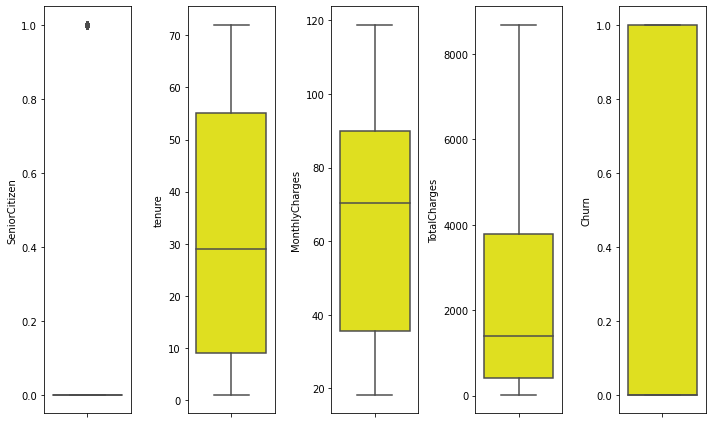

In [9]:
# adjust the figure size for better readability
plt.figure(figsize=(10,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_copy[features[i]], color='yellow')
    plt.tight_layout()

In [10]:
#check outlier
outlier = df['SeniorCitizen'].max()
df[df['SeniorCitizen'] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,0
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,0
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,0
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,0
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,0
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,0
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1


Temuan :
1. Terdapat outlier di kolom SeniorCitizen dengan value 1
2. Ternyata value tersebut berguna untuk membedakan kategori antara seniorcitizen dan bukan. so itu bukan hal yang harus kita drop
3. untuk sisa kolom tidak terdapat outlier

## KDE plot for knowing the distribution form

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

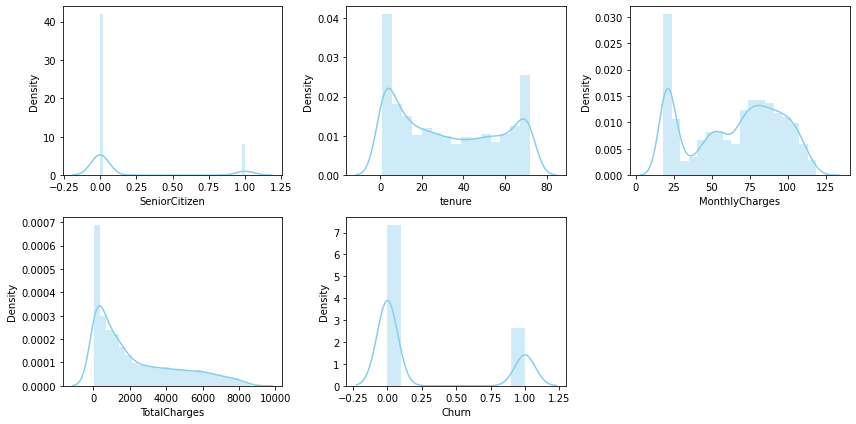

In [11]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_copy[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Temuan:
1. terdapat dua kolom yaitu SeniorCitizen dan Churn yang bersifat diskret,jadi kita dapat mengabaikannya
2. kolom tenure,MonthlyCharges dan TotalCharges bersifat kontinuitas. kolom tenure dan monthlycharges bisa dibilang simetris. sementara kolom totalcharges tidak simetris sehingga dibutuhkan tranformasi data agar distribusinya dapat lebih simetris dan normal.
3. kolom tenure,monthlycharges dan totalcharges bersifat positively skewed.
4. bentuk distribusi pada kolom diatas adalah unimodal,kecuali tenure bersifat bimodal
5. Kebanyakan pelanggan yang berlangganan hanya sekitar 1-2 bulan saja(tenure)
6. Kebanyakan payment yang dibayar pada monthly adalah sekitar 20 an saja  dan total charges sekitar 100-200.

In [ ]:
df_copy.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


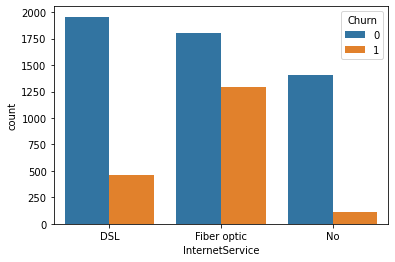

In [ ]:
#Categorical Variable
sns.countplot(data=df_copy,
              hue= 'Churn',
              x= 'InternetService')

Pelanggan yang menggunakan jenis internet service Fiber optic lebih banyak yang churn dari pada yang menggunakan DSL dan tidak menggunakan internet service sama sekali.
tidak churn = 0
churn = 1

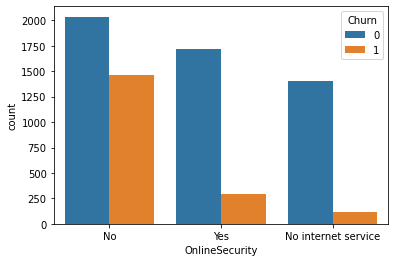

In [18]:
sns.countplot(data=df_copy,
              hue= 'Churn',
              x= 'OnlineSecurity')

##**Multivariate Analysis**

In [14]:
#mengubah kolom dengan kategori yes dan no menjadi 1 dan 0
df_copy['Partner'] = df_copy['Partner'].replace(['Yes','No'],[1,0])

df_copy['Dependents'] = df_copy['Dependents'].replace(['Yes','No'],[1,0])

df_copy['PhoneService'] = df_copy['PhoneService'].replace(['Yes','No'],[1,0])

df_copy['PaperlessBilling'] = df_copy['PaperlessBilling'].replace(['Yes','No'],[1,0])


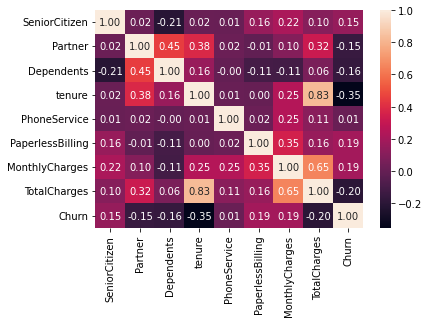

In [13]:
#correlation heatmap
correlation = df_copy.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

dari data diatas dapat kita lihat bahwa tenur dan total charges sangat berkorelasi dengan tingkat churn

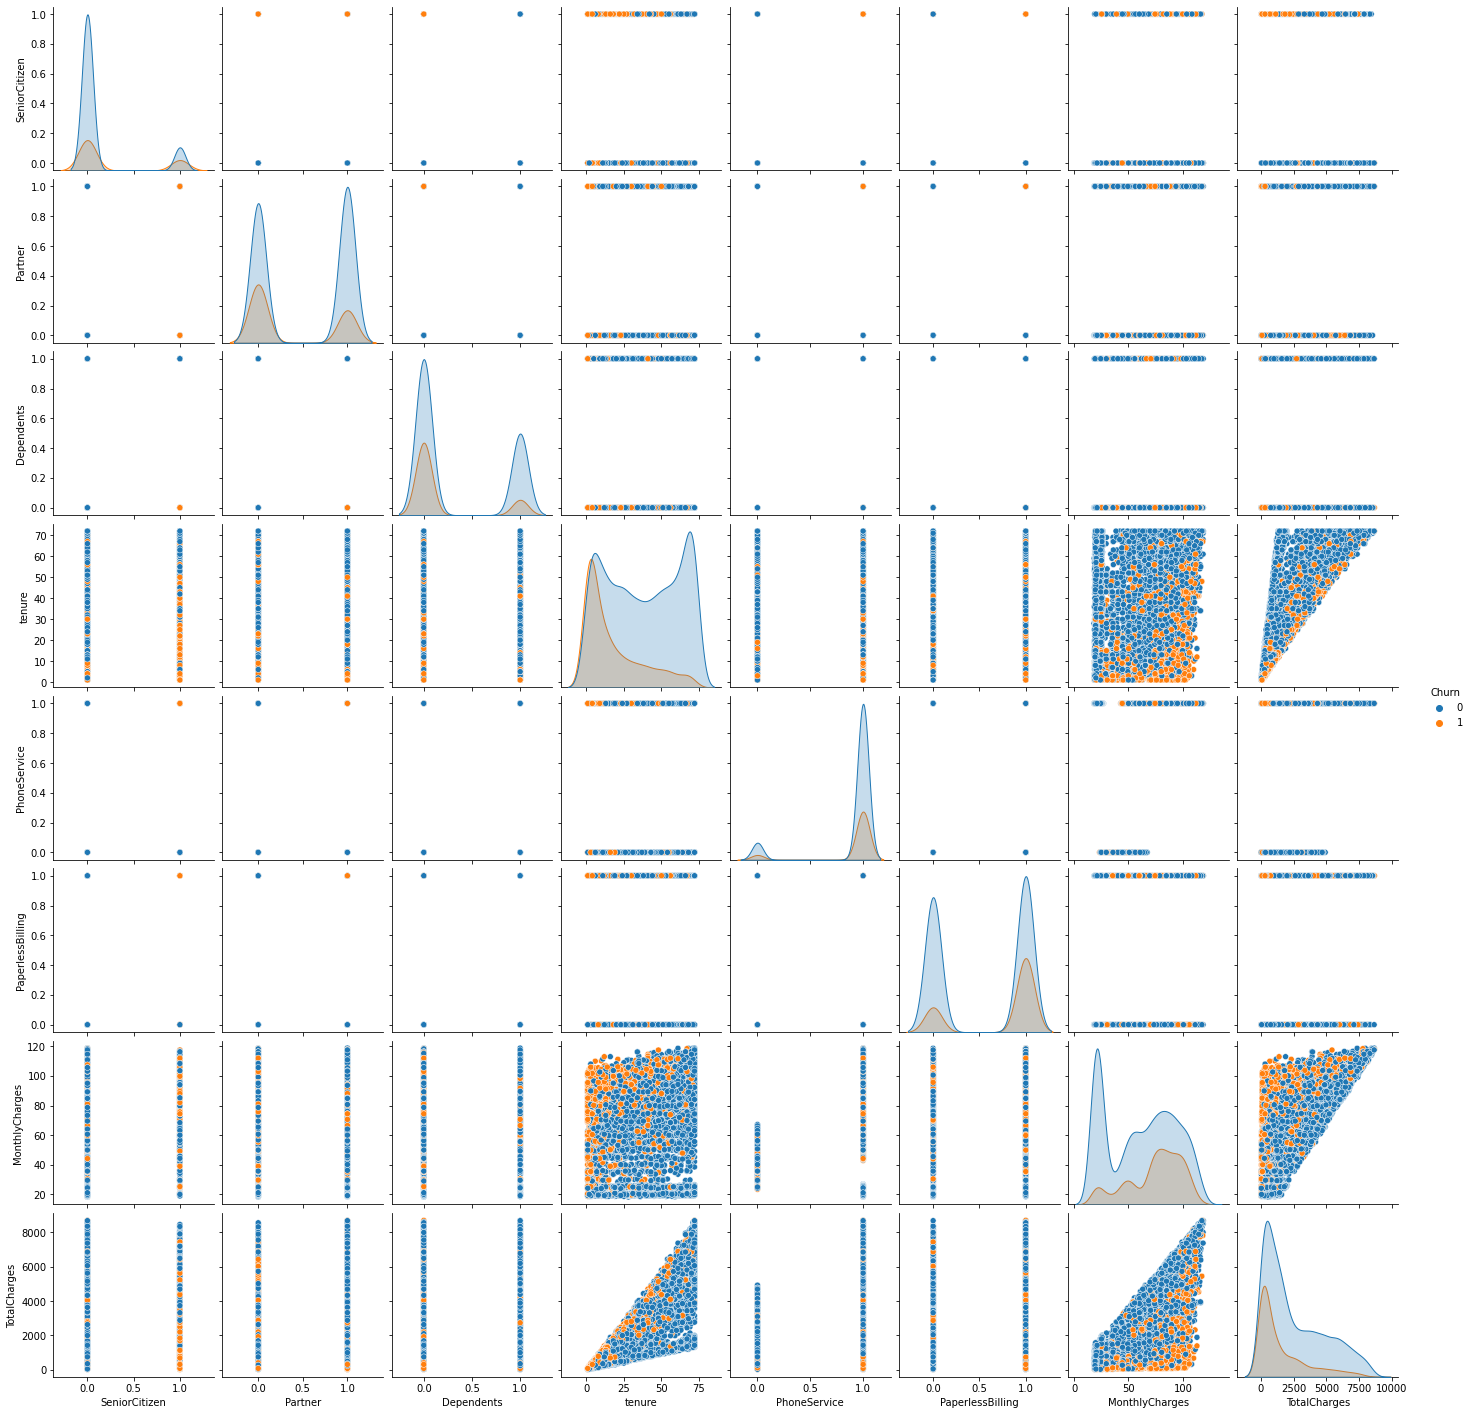

In [16]:
#pairplot of the data
sns.pairplot(df_copy, hue='Churn')

EDA CONCLUSION:
1. Tidak ada missing dan duplicated values pada data 
2. Nilai Min dan Max untuk masing-masing kolom dirasa masih masuk akal mengingat ada beberapa pelanggan yang memang berlangganan selama bertahun-tahun (Tenure) dan juga menggunakan beberapa fitur tambahan yang disediakan oleh perusahaan telco (MonthlyCharges dan Total Charges)
3. Kolom yang berkategori numericals kebanyakan belum simetris dan membentuk positively skewed sehingga perlu dilakukan tindakan lebih lanjut jika ingin melakukan permodelan
4. Terdapat outlier di kolom SeniorCitizen dengan value 1 berguna untuk membedakan kategori antara seniorcitizen dan bukan. jadi itu bukan hal yang harus kita drop
5.  dari barchart categorical variable dapat dilihat bahwa pelanggan yang menggunakan internet service fiber optic banyak yang melakukan churn
6. tenure dan total charges sangat erat kaitannya dengan churn
7. rekomendasi yang mungkin bisa diberikan adalah peningkatan mutu pada layanan internet yang menggunakan fiber optic, serta promo-promo jika pelanggan mengambil beberapa layanan sekaligus.

##DEEP DIVE EXPLORATION

1. Siapa 10 customer ID dengan totalcharges terbanyak dan apa status churnnya?
2. Jenis InternetService apa yang membuat banyak customer menjadi churn?
3. Seberapa besar pengaruh tenure pelanggan terhadap tingkat churn?

In [101]:
#JAWABAN NO 1
top10_cust= (df_copy
          .groupby('customerID')
          .agg(spending= ('TotalCharges','sum'),
              churnrate = ('Churn', 'sum'))
          .reset_index()
          .sort_values('spending',ascending=False)
          .head(10)
           )



top10_cust

,customerID,spending,churnrate
2000,2889-FPWRM,8684.80,1
5350,7569-NMZYQ,8672.45,0
6844,9739-JLPQJ,8670.10,0
6881,9788-HNGUT,8594.40,0
6264,8879-XUAHX,8564.75,0
6982,9924-JPRMC,8547.15,0
462,0675-NCDYU,8543.25,0
4710,6650-BWFRT,8529.50,0
95,0164-APGRB,8496.70,0
1028,1488-PBLJN,8477.70,0


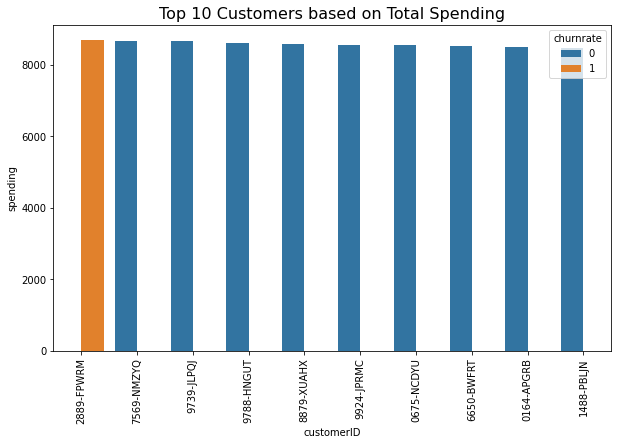

In [123]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10_cust, x='customerID', y='spending', hue= 'churnrate')
plt.xticks(rotation=90)
plt.title('Top 10 Customers based on Total Spending',fontsize=16)
plt.show()

top 10 customers diatas harus lebih dimanjakan lagi dengan promo yang menarik, tapi sayangnya customer dengan no 1 top spending melakukan churn. rekomendasinya mungkin cust dengan no 1 top spending tersebut dapat dikontak ulang untuk ditawari promo yang lebih menarik

In [76]:
#JAWABAN NO 2
df_inet = (df_copy
          .groupby('InternetService')
          .agg(churnrate= ('Churn','count'))
          ).reset_index()
df_inet                          

,InternetService,churnrate
0,DSL,2416
1,Fiber optic,3096
2,No,1520


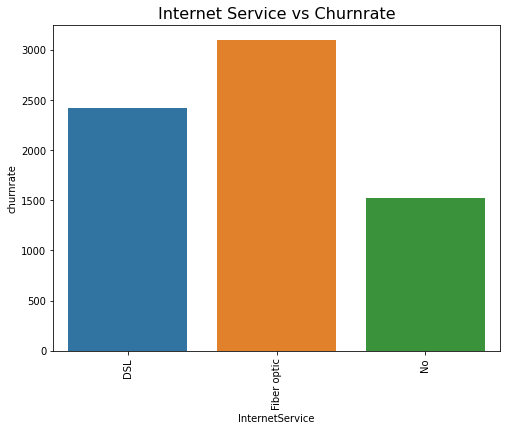

In [124]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_inet, x='InternetService', y='churnrate')
plt.xticks(rotation=90)
plt.title('Internet Service vs Churnrate',fontsize=16)
plt.show()

Jenis Internet Service Fiber Opticlah yang berpengaruh terhadap tingkat churn

Text(0, 0.5, 'Churn Rate(%)')

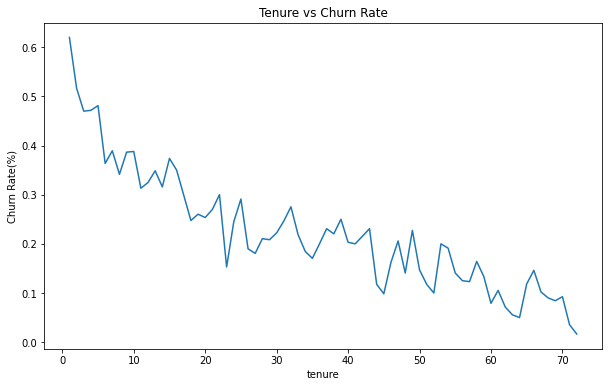

In [134]:
#JAWABAN 3
(df_copy.groupby(['tenure'])['Churn'].mean()).plot(kind='line',figsize=(10,6))
plt.title('Tenure vs Churn Rate',fontsize=12)
plt.ylabel('Churn Rate(%)')

semakain lama pelanggan berlangganan semakin kecil persentase churn mereka